In [ ]:
#анализ пиков на записях с шипов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
Means = []
meansdiff = []
list_of_files = ['st2mut_03apr_5.csv'] #1 2 3 5
#list_of_files = ['st2_03apr_7.csv'] #1 2  467
#list_of_files = ['kont_03apr_6.csv'] #1456
fraction = 2
fraction1 = 1.5
fraction2 = 1.1

fraction_n = 2.5
fraction_1 = 2
fraction_2 = 1.5
xarr = np.linspace(0, 80, 400)
df1 = pd.DataFrame()
df4 = pd.DataFrame()
for i in list_of_files:
    df = pd.read_csv(i)
    for column in df.columns[1:]:
        df.dropna(subset = [f'{column}'], inplace = True)
        meansdiff = [a-e for a,e in zip(df[column].tolist(), df[df.columns[-1]].tolist())]
        if np.mean(meansdiff) !=0:
            Means = [d/np.mean(meansdiff[0:29]) for d in (meansdiff)]
            df1[f'MeanNorm{i}{column}'] = pd.Series(Means)
        else: 
            Means = df[df.columns[-1]].tolist()
            df1[f'MeanNorm{i}{column}'] = pd.Series(Means)
        meansdiff = []
#костыли
df1.to_excel('output_.xlsx')
df2 = pd.read_excel('output_.xlsx')
#костыли
dffinal = pd.DataFrame()

#костыли
interval = False
interval1 = False
interval2 = False
count_int_arr = []
count_int_arr1 = []
count_int_arr2 = []
intervaln = False
intervaln1 = False
intervaln2 = False
count_int_arrn = []
count_int_arrn1 = []
count_int_arrn2 = []
area_arr = []
for column in df2.columns[1::2]:
    maximum = max(df2[column].tolist())
    meanf = np.mean(df2[column].tolist())
    area = np.trapz(df2[column].tolist(), dx = 0.2)
    m = meanf + (maximum-meanf)/fraction
    m1 = meanf + (maximum-meanf)/fraction1
    m2 = meanf + (maximum-meanf)/fraction2
    count_int = 0
    interval = False
    countxax = 0

    count_int1 = 0
    interval1 = False
    countxax1 = 0

    count_int2 = 0
    interval2 = False
    countxax2 = 0
    for n, i in enumerate(df2[column].tolist()):
        if i > m and interval == False:
            interval = True 
            countxax = n
        if interval and i <= m and (n-countxax) > 5:
            interval = False
            count_int += 1
        elif interval and i <= m and (n-countxax) <= 5:
            interval = False

        if i > m1 and interval1 == False:
            interval1 = True 
            countxax1 = n
        if interval1 and i <= m1 and (n-countxax1) > 5:
            interval1 = False
            count_int1 += 1
        elif interval1 and i <= m1 and (n-countxax1) <= 5:
            interval1 = False

        if i > m2 and interval2 == False:
            interval2 = True 
            countxax2 = n
        if interval2 and i <= m2 and (n-countxax2) > 5:
            interval2 = False
            count_int2 += 1
        elif interval2 and i <= m2 and (n-countxax2) <= 5:
            interval2 = False
    count_int_arr.append(count_int)
    count_int_arr1.append(count_int1)
    count_int_arr2.append(count_int2)
    area_arr.append(area)
#костыли
number = 0
number1 = 0
number2 = 0
newcountarr = []
newcountarr1 = []
newcountarr2 = []

for i in count_int_arr:
    if i > 1:
        number +=1
        newcountarr.append(i)

for i in count_int_arr1:
    if i > 1:
        number1 +=1
        newcountarr1.append(i)

for i in count_int_arr2:
    if i > 1:
        number2 +=1
        newcountarr2.append(i)
areanarr = []
for spine, dendrite in zip(df2.columns[1::2], df2.columns[2::2]):
    maximumn = max([a/b for a,b in zip(df2[spine].tolist(), df2[dendrite].tolist())])
    meann = np.mean([a/b for a,b in zip(df2[spine].tolist(), df2[dendrite].tolist())])
    arean = np.trapz([a/b for a,b in zip(df2[spine].tolist(), df2[dendrite].tolist())], dx = 0.2)
    m = meann + (maximumn-meann)/fraction_n
    m1 = meann + (maximumn-meann)/fraction_1
    m2 = meann + (maximumn-meann)/fraction_2

    countn_int = 0
    intervaln = False
    countindexn = 0

    countn_int1 = 0
    intervaln1 = False
    countindexn1 = 0

    countn_int2 = 0
    intervaln2 = False
    countindexn2 = 0

    df4[f'MeanNorm{spine}'] = pd.Series([a/b for a,b in zip(df2[spine].tolist(), df2[dendrite].tolist())])

    for n, i in enumerate([a/b for a,b in zip(df2[spine].tolist(), df2[dendrite].tolist())]):
        if i > m and intervaln == False:
            intervaln = True
            countindexn = n     
        if intervaln and i <= m and (n-countindexn) > 5:
            intervaln = False
            countn_int += 1
        elif intervaln and i <= m and (n-countindexn) <= 5:
            intervaln = False
        
        if i > m1 and intervaln1 == False:
            intervaln1 = True
            countindexn1 = n     
        if intervaln1 and i <= m1 and (n-countindexn1) > 5:
            intervaln1 = False
            countn_int1 += 1
        elif intervaln1 and i <= m1 and (n-countindexn1) <= 5:
            intervaln1 = False
        
        if i > m2 and intervaln2 == False:
            intervaln2 = True
            countindexn2 = n     
        if intervaln2 and i <= m2 and (n-countindexn2) > 5:
            intervaln2 = False
            countn_int2 += 1
        elif intervaln2 and i <= m2 and (n-countindexn2) <= 5:
            intervaln2 = False
    areanarr.append(arean)
    count_int_arrn.append(countn_int)
    count_int_arrn1.append(countn_int1)
    count_int_arrn2.append(countn_int2)
numbern = 0
numbern1 = 0
numbern2 = 0
#костыли
newcountarrn = []
newcountarrn1 = []
newcountarrn2 = []
for i in count_int_arrn:
    if i > 1:
        numbern +=1
        newcountarrn.append(i)

for i in count_int_arrn1:
    if i > 1:
        numbern1 +=1
        newcountarrn1.append(i)

for i in count_int_arrn2:
    if i > 1:
        numbern2 +=1
        newcountarrn2.append(i)
print(number)
print(count_int_arr)
print(numbern)
print(count_int_arrn)
#костыли
dffinal['Это костыль чтобы не переживать что все точно вывелось'] = pd.Series(range(0,30))
dffinal['Spines_total'] = pd.Series(len(count_int_arr)-1)

dffinal['Peaks_not_normalised'] = pd.Series(newcountarr)
dffinal['Peaks_not_normalised_повыше'] = pd.Series(newcountarr1)
dffinal['Peaks_not_normalised_ещё_повыше'] = pd.Series(newcountarr2)

dffinal['Peaking_number_not_normalised'] = pd.Series(number)
dffinal['Peaking_number_not_normalised_повыше'] = pd.Series(number1)
dffinal['Peaking_number_not_normalised_ещё_повыше'] = pd.Series(number2)
dffinal['Area'] = pd.Series(area_arr)

dffinal['Peaks_normalised'] = pd.Series(newcountarrn)
dffinal['Peaks_normalised_повыше'] = pd.Series(newcountarrn1)
dffinal['Peaks_normalised_ещё_повыше'] = pd.Series(newcountarrn2)

dffinal['Peaking_number_normalised'] = pd.Series(numbern)
dffinal['Peaking_number_normalised_повыше'] = pd.Series(numbern1)
dffinal['Peaking_number_normalised_ещё_повыше'] = pd.Series(numbern2)
dffinal['Area_normalised'] = pd.Series(areanarr)
dffinal.to_excel(f'output_{list_of_files}.xlsx')

In [ ]:
#анализ текстуры GLCM
import pandas as pd
import itertools
import numpy as np
list_of_files = ['lstmut002.csv','stmut001d.csv']
AngularSecondMoment = []
Contrast = []
Correlation = []
InverseDifferenceMoment = []
Entropy = []
df1 = pd.DataFrame()
for i in list_of_files:
    df = pd.read_csv(i)
    df.dropna(subset = ['Angular Second Moment',
                         'Contrast', 
                         'Correlation', 
                         'Inverse Difference Moment   ',
                         'Entropy' 
                         ], inplace = True)
    AngularSecondMoment.append(np.mean(df['Angular Second Moment'].tolist()))
    Contrast.append(np.mean(df['Contrast'].tolist()))
    Correlation.append(np.mean(df['Correlation'].tolist()))
    InverseDifferenceMoment.append(np.mean(df['Inverse Difference Moment   '].tolist()))
    Entropy.append(np.mean(df['Entropy'].tolist()))
    
df1['Angular Second Moment'] = pd.Series(list(AngularSecondMoment))
df1['Contrast'] = pd.Series(list(Contrast))
df1['Correlation'] = pd.Series(list(Correlation))
df1['Inverse Difference Moment   '] = pd.Series(list(InverseDifferenceMoment))
df1['Entropy'] = pd.Series(list(Entropy))
df1.to_excel('output_st2mut_tex.xlsx')

In [ ]:
#анализ текстуры с помощью аналайзера
import pandas as pd
import itertools

#list_of_files = ['MAX_ds43ed-results.xlsx','MAX_Untitled002-results.xlsx','MAX_Untitled002-results.xlsx']
#list_of_files = ['MAX_s2006-results.xlsx','MAX_st-results.xlsx','MAX_st2-results.xlsx']
list_of_files = ['MAX_st2mut001-results.xlsx','MAX_st2mut002-results.xlsx','MAX_stmut002-results.xlsx']
cist_area = []
solidity = []
roughness = []
cisternae_mean_cisternal_Contrast = []
mean_intensity = []
cisternal_Variance = []
cisternae_mean_cisternal_Correlation = []
cisternae_mean_cisternal_Homogeneity = []
cisternae_mean_cisternal_Energy = []
df1 = pd.DataFrame()


for i in list_of_files:
    df = pd.read_excel(i, sheet_name='Summary table')
    df.dropna(subset = ['cisternae_mean_cisternal_Area',
                         'cisternae_mean_cisternal_Solidity', 
                         'cisternae_mean_cisternal_Roughness', 
                         'cisternae_mean_cisternal_Contrast',
                         'cisternae_mean_cisternal_MeanIntensity', 
                         'cisternae_mean_cisternal_Variance', 
                         'cisternae_mean_cisternal_Correlation',
                        'cisternae_mean_cisternal_Homogeneity', 
                        'cisternae_mean_cisternal_Energy'], inplace = True)
    
    cist_area.append(df['cisternae_mean_cisternal_Area'].tolist())
    solidity.append(df['cisternae_mean_cisternal_Solidity'].tolist())
    roughness.append(df['cisternae_mean_cisternal_Roughness'].tolist())
    cisternae_mean_cisternal_Contrast.append(df['cisternae_mean_cisternal_Contrast'].tolist())
    mean_intensity.append(df['cisternae_mean_cisternal_MeanIntensity'].tolist())
    cisternal_Variance.append(df['cisternae_mean_cisternal_Variance'].tolist())
    cisternae_mean_cisternal_Correlation.append(df['cisternae_mean_cisternal_Correlation'].tolist())
    cisternae_mean_cisternal_Homogeneity.append(df['cisternae_mean_cisternal_Homogeneity'].tolist())
    cisternae_mean_cisternal_Energy.append(df['cisternae_mean_cisternal_Energy'].tolist())

df1['cisternae_mean_cisternal_Area'] = pd.Series(list(itertools.chain(*cist_area)))
df1['cisternae_mean_cisternal_Solidity'] = pd.Series(list(itertools.chain(*solidity)))
df1['cisternae_mean_cisternal_Roughness'] = pd.Series(list(itertools.chain(*roughness)))
df1['cisternae_mean_cisternal_Contrast'] = pd.Series(list(itertools.chain(*cisternae_mean_cisternal_Contrast)))
df1['cisternae_mean_cisternal_MeanIntensity'] = pd.Series(list(itertools.chain(*mean_intensity)))
df1['cisternae_mean_cisternal_Variance'] = pd.Series(list(itertools.chain(*cisternal_Variance)))
df1['cisternae_mean_cisternal_Correlation'] = pd.Series(list(itertools.chain(*cisternae_mean_cisternal_Correlation)))
df1['cisternae_mean_cisternal_Homogeneity'] = pd.Series(list(itertools.chain(*cisternae_mean_cisternal_Homogeneity)))
df1['cisternae_mean_cisternal_Energy'] = pd.Series(list(itertools.chain(*cisternae_mean_cisternal_Energy)))


df1.to_excel('output_st2mut_vol.xlsx')

In [ ]:
#шипы из спайнджей
import pandas as pd
import itertools
#re-save the exported tables as xlsx first to un-corrupt them 
#the lengths of dendeites are to be saved as the whole csv file after measuring
#in the cell below there is a script for pre-extracted lengths

list_of_files = ['11.csv']
list_of_len_files= ['1.csv']

lengths_of_dendrites = []
list_of_numbers = []
length = []
lengths = []
rat = []
perimeter = []
area = []
df1 = pd.DataFrame()

for i in list_of_len_files:
    df_l = pd.read_csv(i)
    lengths_of_dendrites.append(df_l['Length'].tolist())
for i in list_of_files:
    df = pd.read_csv(i, encoding='Latin-1')
    df.dropna(subset = ['Length neck (nm)', 'Length spine (nm)', 'Ratio (%)', 'Perimeter Head (nm)','Area Head (nm²)'], inplace = True)
    list_of_numbers.append(df.shape[0])
    length.append(df['Length neck (nm)'].tolist())
    lengths.append(df['Length spine (nm)'].tolist())
    rat.append(df['Ratio (%)'].tolist())
    perimeter.append(df['Perimeter Head (nm)'].tolist())
    area.append(df['Area Head (nm²)'].tolist())

spinecount = [a*10000/b for a,b in zip(list_of_numbers,list(itertools.chain(*lengths_of_dendrites)))]

df1['Length neck (nm)'] = pd.Series(list(itertools.chain(*length)))
df1['Length spine (nm)'] = pd.Series(list(itertools.chain(*lengths)))
df1['Ratio (%)'] = pd.Series(list(itertools.chain(*rat)))
df1['Perimeter Head (nm)'] = pd.Series(list(itertools.chain(*perimeter)))
df1['Area Head (nm²)'] = pd.Series(list(itertools.chain(*area)))
df1['number_of_spines'] = pd.Series(spinecount)

df1.to_excel('oput.xlsx')

In [ ]:
#шипы из спайнджей без длин
import pandas as pd
import itertools
#re-save the exported tables as xlsx first to un-corrupt them 
#the lengths of dendeites are to be saved as the whole csv file after measuring
#in the cell below there is a script for pre-extracted lengths

list_of_files = ['11.csv']
list_of_len_files= ['1.csv']

lengths_of_dendrites = []
list_of_numbers = []
length = []
lengths = []
rat = []
perimeter = []
area = []
df1 = pd.DataFrame()

for i in list_of_len_files:
    df_l = pd.read_csv(i)
    lengths_of_dendrites.append(df_l['Length'].tolist())
for i in list_of_files:
    df = pd.read_csv(i, encoding='Latin-1')
    df.dropna(subset = ['Length neck (nm)', 'Length spine (nm)', 'Ratio (%)', 'Perimeter Head (nm)','Area Head (nm²)'], inplace = True)
    list_of_numbers.append(df.shape[0])
    length.append(df['Length neck (nm)'].tolist())
    lengths.append(df['Length spine (nm)'].tolist())
    rat.append(df['Ratio (%)'].tolist())
    perimeter.append(df['Perimeter Head (nm)'].tolist())
    area.append(df['Area Head (nm²)'].tolist())

spinecount = [a*10000/b for a,b in zip(list_of_numbers,list(itertools.chain(*lengths_of_dendrites)))]

df1['Length neck (nm)'] = pd.Series(list(itertools.chain(*length)))
df1['Length spine (nm)'] = pd.Series(list(itertools.chain(*lengths)))
df1['Ratio (%)'] = pd.Series(list(itertools.chain(*rat)))
df1['Perimeter Head (nm)'] = pd.Series(list(itertools.chain(*perimeter)))
df1['Area Head (nm²)'] = pd.Series(list(itertools.chain(*area)))
df1['number_of_spines'] = pd.Series(spinecount)

df1.to_excel('oput.xlsx')

In [ ]:
#анализ числа шипов, попадающих в квадранты
import numpy as np
import matplotlib.pyplot as plt

#list_of_files = ['MAX_1-1.xlsx','MAX_1-2.xlsx','MAX_1-3.xlsx','MAX_2-1.xlsx','MAX_2-2.xlsx','MAX_3-1.xlsx','MAX_3-2.xlsx','MAX_4-1.xlsx','MAX_4-2.xlsx','MAX_5-1.xlsx','MAX_5-2.xlsx','MAX_7-1.xlsx','MAX_7-2.xlsx','MAX_9-1.xlsx','MAX_9-2.xlsx']
xarr = np.array(list(itertools.chain(*rat)))
yarr = np.array(list(itertools.chain(*area)))

xarrnew = []
yarrnew = []
df2 = pd.read_excel('ab.xlsx')
xarrnew.append(df2['ratio'].tolist())
yarrnew.append(df2['area'].tolist())
xarrn = np.array(list(itertools.chain(*xarrnew)))
yarrn = np.array(list(itertools.chain(*yarrnew)))

def filter (xarr, yarr, lowx, lowy, highx, highy):
    amount = 0
    xarrr = []
    yarrt = [lowy < j < highy for j in yarr]
    for i,c in enumerate(xarr):
        if lowx < c < highx and yarrt[i]:
                xarrr.append(True)
                amount +=1
        else:
                xarrr.append(False)
    x = xarr[xarrr]
    y = yarr[xarrr]

    return x, y, amount
x, y, am = filter(xarr, yarr, 0, 0, 35, 1*10**6)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0, 35, 1*10**6)

fit = np.polyfit(xarr, yarr, 1)
fit2 = np.polyfit(xarrn, yarrn, 1)
yn = xarr*fit[0] + fit[1]
yn2 = xarrn*fit2[0] + fit2[1]
plt.subplot(111)
plt.scatter(yarr, xarr, label='ab')
plt.scatter(yarrn, xarrn, label='ab_NR')
#plt.plot(yn, xarr)
#plt.plot(yn2, xarrn)
plt.legend()
plt.ylabel('ratio')
plt.xlabel('area')

print (f'ab:{am}, control: {am1}')


In [ ]:
#анализ числа шипов, попадающих в квадранты
total1 = filter(xarr, yarr, 0, 0, max(xarr)+1, max(yarr)+1)[2]
total2 = filter(xarrn, yarrn, 0, 0, max(xarr)+1, max(yarr)+1)[2]

x, y, am = filter(xarr, yarr, 35, 0.5*10**6, max(xarr)+1, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 35, 0.5*10**6, max(xarr)+1, max(yarr)+1)
print (f' (1) ab:{np.round(am/total1*100, 2)}, ab_NR: {np.round(am1/total2*100, 2)}')

x, y, am = filter(xarr, yarr, 35, 0, max(xarr)+1, 0.5*10**6)
x1, y1, am1 = filter(xarrn, yarrn, 35, 0, max(xarr)+1, 0.5*10**6)
print (f' (2) ab:{np.round(am/total1*100, 2)}, ab_NR: {np.round(am1/total2*100, 2)}')


x, y, am = filter(xarr, yarr, 0, 0, 35, 0.5*10**6)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0, 35, 0.5*10**6)
print (f' (3) ab:{np.round(am/total1*100, 2)}, ab_NR: {np.round(am1/total2*100, 2)}')

x, y, am = filter(xarr, yarr, 0, 0.5*10**6, 35, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0.5*10**6, 35, max(yarr)+1)
print (f' (4) ab:{np.round(am/total1*100, 2)}, ab_NR: {np.round(am1/total2*100, 2)}')

x, y, am = filter(xarr, yarr, 0, 0, max(xarr)+1, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0, max(xarr)+1, max(yarr)+1)
print (f' (total) ab:{np.round(am/total1*100, 2)}, ab_NR: {np.round(am1/total2*100, 2)}')


In [ ]:
#анализ числа шипов, попадающих в квадранты
x, y, am = filter(xarr, yarr, 35, 0.5*10**6, max(xarr)+1, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 35, 0.5*10**6, max(xarr)+1, max(yarr)+1)
print (f' (1) ab:{am}, ab_NR: {am1}')

x, y, am = filter(xarr, yarr, 35, 0, max(xarr)+1, 0.5*10**6)
x1, y1, am1 = filter(xarrn, yarrn, 35, 0, max(xarr)+1, 0.5*10**6)
print (f' (2) ab:{am}, ab_NR: {np.round(am1/total2*100, 2)}')


x, y, am = filter(xarr, yarr, 0, 0, 35, 0.5*10**6)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0, 35, 0.5*10**6)
print (f' (3) ab:{am}, ab_NR: {am1}')

x, y, am = filter(xarr, yarr, 0, 0.5*10**6, 35, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0.5*10**6, 35, max(yarr)+1)
print (f' (4) ab:{am}, ab_NR: {am1}')

x, y, am = filter(xarr, yarr, 0, 0, max(xarr)+1, max(yarr)+1)
x1, y1, am1 = filter(xarrn, yarrn, 0, 0, max(xarr)+1, max(yarr)+1)
print (f' (total) ab:{am}, ab_NR: {am1}')

In [ ]:
#результаты из таблиц аналайзера
import pandas as pd
import itertools

list_of_files = ['MAX_dsred0-results.xlsx','MAX_dsred-results.xlsx','MAX_dsred1-results.xlsx','MAX_dsred2-results.xlsx','MAX_dsred3-results.xlsx','MAX_dsred4-results.xlsx','MAX_dsred5-results.xlsx','MAX_dsred6-results.xlsx','MAX_dsred7-results.xlsx','MAX_dsred8-results.xlsx','MAX_dsred9-results.xlsx','MAX_dsred10-results.xlsx','MAX_dsred11-results.xlsx','MAX_dsred12-results.xlsx','MAX_dsred13-results.xlsx', 'dsred_1803_1-results.xlsx']
list_of_area_files = ['dsred0.xlsx', 'dsred.xlsx','dsred1.xlsx','dsred2.xlsx','dsred3.xlsx','dsred4.xlsx','dsred5.xlsx','dsred6.xlsx','dsred7.xlsx','dsred8.xlsx','dsred9.xlsx','dsred10.xlsx','dsred11.xlsx','dsred12.xlsx','dsred13.xlsx','dsred_1803_1_area_full.xlsx']
areas1 = []
areas2 = []
cist_area = []
solidity = []
roughness = []
count_cist = []
mean_intensity = []
tubule_volume = []
cist_node_degree = []
tub_node_degree = []
tubule_length = []
df1 = pd.DataFrame()

for i in list_of_area_files:
    df_l = pd.read_excel(i)
    areas1.append([float(x) for x in (df_l['Area1'].tolist())])
    print(df_l['Area1'])
    areas2.append([float(x) for x in (df_l['Area2'].tolist())])

for i in list_of_files:
    df = pd.read_excel(i, sheet_name='Summary table')
    df.dropna(subset = ['cisternae_mean_cisternal_Area',
                         'cisternae_mean_cisternal_Solidity', 
                         'cisternae_mean_cisternal_Roughness', 
                         'cisternae_GroupCount_cisternae',
                         'cisternae_mean_cisternal_MeanIntensity', 
                         'graph_mean_volume', 
                         'cisternae_mean_cisternal_Node_degree',
                        'graph_mean_total_length', 
                        'nodes_mean_node_Degree'], inplace = True)
    
    cist_area.append(df['cisternae_mean_cisternal_Area'].tolist())
    solidity.append(df['cisternae_mean_cisternal_Solidity'].tolist())
    roughness.append(df['cisternae_mean_cisternal_Roughness'].tolist())
    count_cist.append(df['cisternae_GroupCount_cisternae'].tolist())
    mean_intensity.append(df['cisternae_mean_cisternal_MeanIntensity'].tolist())
    tubule_volume.append(df['graph_mean_volume'].tolist())
    cist_node_degree.append(df['cisternae_mean_cisternal_Node_degree'].tolist())
    tub_node_degree.append(df['nodes_mean_node_Degree'].tolist())
    tubule_length.append(df['graph_mean_total_length'].tolist())

df1['cisternae_mean_cisternal_Area'] = pd.Series(list(itertools.chain(*cist_area)))
df1['cisternae_mean_cisternal_Solidity'] = pd.Series(list(itertools.chain(*solidity)))
df1['cisternae_mean_cisternal_Roughness'] = pd.Series(list(itertools.chain(*roughness)))
df1['cisternae_GroupCount_cisternae'] = pd.Series(list(itertools.chain(*count_cist)))
df1['cisternae_mean_cisternal_MeanIntensity'] = pd.Series(list(itertools.chain(*mean_intensity)))
df1['graph_mean_volume'] = pd.Series(list(itertools.chain(*tubule_volume)))
df1['cisternae_mean_cisternal_Node_degree'] = pd.Series(list(itertools.chain(*cist_node_degree)))
df1['graph_mean_total_length'] = pd.Series(list(itertools.chain(*tubule_length)))
df1['nodes_mean_node_Degree'] = pd.Series(list(itertools.chain(*tub_node_degree)))

cell_area = [abs(a-b) for a,b in zip(list(itertools.chain(*areas1)), list(itertools.chain(*areas2)))]
df1['cell_area'] = pd.Series(cell_area)
percent_of_cist = [a*b/c*100 for a,b,c in zip(list(itertools.chain(*count_cist)),list(itertools.chain(*cist_area)), cell_area)]
df1['percent_of_cist'] = pd.Series(percent_of_cist)
percent_of_tubule = [2*(v*l/3.1415926)**0.5/c*100 for v, l, c in zip(list(itertools.chain(*tubule_volume)), list(itertools.chain(*tubule_length)), cell_area)]

df1['percent_of_tubule'] = pd.Series(percent_of_tubule)

df1.to_excel('output_gr_vol.xlsx')

In [ ]:
#z slice обработка
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
list_of_len_files= ['ds43ed.csv', 'ds43ed001.csv','ds43ed003.csv', 'dsred.csv', 'Untitled004.csv', 'Untitled005.csv','Untititled002.csv','Untitled0021.csv', 'Untitled003.csv', 'Untitled0041.csv', 'Untitled0051.csv', 'Untitled006.csv', 'Unttitled007.csv', 'ds45ed.csv', 'ds45red001.csv', 'ds45red002.csv']
#list_of_len_files= ['st.csv', 'st001.csv','st2006.csv']
#list_of_len_files= ['st2mut.csv', 'st2mut001.csv','st2mut002.csv']
mean = []
slices = []
grx = []
df1 = pd.DataFrame()
f = []
a = range(0, 50)
max_array = []
max_array_f = []
maxind = []
maxindf = []
tg = []

#Ресэмплинг выглядит аналогично исходным данным

for i in list_of_len_files:
    df_l = pd.read_csv(i)
    slices.append(df_l['Slice'].tolist())
    mean.append(df_l['Mean'].tolist())
for k in range(0, len(list_of_len_files)):
    graphx = [i/len(mean[k]) for i in slices[k]]
    grx.append(graphx)
for index, i in enumerate(mean):
    f.append(signal.resample(i, 50))
    max_array.append(max(i))
    maxind.append(grx[index][(max((v, ind) for ind, v in enumerate(i))[1])])
for index, i in enumerate(f):
    max_array_f.append(max(i))
    maxindf.append(a[(max((v, ind) for ind, v in enumerate(i))[1])])
for index, i in enumerate(f):
    if maxindf[index] >=8:
        tg.append(i[maxindf[index]]-i[maxindf[index]-8]/8)
    elif maxindf[index] >=2:
        tg.append(i[maxindf[index]]-i[maxindf[index]-2]/2)
    
        
maxaverage = np.average(max_array)
sem = np.std(max_array, axis = 0)/((len(max_array))**(0.5))
maxaveragef = np.average(max_array_f)
sem_f = np.std(max_array_f, axis = 0)/((len(max_array_f))**(0.5))



for i in range(len(list_of_len_files)):
    df1[f'dsred{i}'] = pd.Series(list(itertools.chain(f[i])))
df1[f'max'] = pd.Series(list(itertools.chain(max_array)))
df1[f'maxind'] = pd.Series(list(itertools.chain(maxind)))
df1['peak_average'] =  pd.Series(maxaverage)
df1['peak_sem'] =  pd.Series(sem)
df1['peak_average_f'] =  pd.Series(maxaveragef)
df1['peak_sem_f'] =  pd.Series(sem_f)
df1['tg'] = pd.Series(tg)
df1.to_excel('output_validation_dsred.xlsx')

plt.figure()
plt.subplot(211)
plt.plot(a, f[0], 'o')
plt.plot(a, f[1], 'o')
plt.plot(a, f[2], 'o')


plt.subplot(212)
plt.plot(grx[0], mean[0], 'o')
plt.plot(grx[1], mean[1], 'o')
plt.plot(grx[2], mean[2], 'o')


plt.show()

In [ ]:
#er clusters in spines
import pandas as pd

import matplotlib.pyplot as plt


'''
list_of_files = ['dsred001_er_area.csv',
                 'dsred003_er_area.csv',
                 'dsred004_er_area.csv',
                 'dsred005_er_area.csv',
                 'dsred006_er_area.csv']
list_of_area_files = ['dsred001_spine_area.csv',
                 'dsred003_spine_area.csv',
                 'dsred004_spine_area.csv',
                 'dsred005_spine_area.csv',
                 'dsred006_spine_area.csv']


list_of_files = ['stim2001_er_area.csv',
                 'stim2002_er_area.csv',
                 'stim2003_er_area.csv',
                 'stim2004_er_area.csv',
                 'stim2005_er_area.csv',
                 'stim2006_er_area.csv',
                 'stim2007_er_area.csv']
list_of_area_files = ['stim2001_spine_area.csv',
                 'stim2002_spine_area.csv',
                 'stim2003_spine_area.csv',
                 'stim2004_spine_area.csv',
                 'stim2005_spine_area.csv',
                 'stim2006_spine_area.csv',
                 'stim2007_spine_area.csv']


list_of_files = ['stimmut_er_area.csv',
                 'stimmut002_er_area.csv',
                 'stimmut003_er_area.csv',
                 'stimmut004_er_area.csv',
                 'stimmut006_er_area.csv',
                 'stimmut007_er_area.csv']
list_of_area_files = ['stimmut_spine_area.csv',
                 'stimmut002_spine_area.csv',
                 'stimmut003_spine_area.csv',
                 'stimmut004_spine_area.csv',
                 'stimmut006_spine_area.csv',
                 'stimmut007_spine_area.csv']
                 '''

er = pd.DataFrame()
spines = pd.DataFrame()

def read(name, dframe, list_of_files_):
    dframe[f'contr'] = pd.Series(([float(k) for k in range(0,35)]))
    for i in list_of_files_:
        df = pd.read_csv(i)
        meansdiff = []
        for column in df.columns:
            df.dropna(subset = [f'{column}'], inplace = True)
            meansdiff.append(df[column][0])
        dframe[f'{i}'] = pd.Series(meansdiff[1:])
        dframe.to_excel(f'output_{name}.xlsx')
        
    
read('er_dsred', er, list_of_files)   
read('spines_dsred', spines, list_of_area_files)

In [ ]:
#текстура в объеме клетки
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

list_of_len_files = ['5.csv','6.csv','7.csv', 's2006.csv','st.csv','st001.csv', 'st002.csv','st2.csv','st003.csv','st21.csv','st2001.csv','st2002.csv','stim2.csv','stim60.csv','stim60001.csv','stim60002.csv','stim60003.csv','stm22.csv']
AngularSecondMoment = []
Contrast = []
Correlation = []
InverseDifferenceMoment = []
Entropy = []
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
for i in list_of_len_files:
    df = pd.read_csv(i)
    df.dropna(subset = ['Angular Second Moment',
                         'Contrast', 
                         'Correlation', 
                         'Inverse Difference Moment   ',
                         'Entropy' 
                         ], inplace = True)

    df1[f'Angular Second Moment{i}'] = pd.Series(signal.resample((df['Angular Second Moment'].tolist()), 50))
    df2[f'Contrast{i}'] = pd.Series(signal.resample((df['Contrast'].tolist()),50))
    df3[f'Correlation{i}'] = pd.Series(signal.resample((df['Correlation'].tolist()),50))
    df4[f'Inverse Difference Moment{i}'] = pd.Series(signal.resample((df['Inverse Difference Moment   '].tolist()),50))
    df5[f'Entropy{i}'] = pd.Series(signal.resample((df['Entropy'].tolist()),50))
df1.to_excel('output_Angular_Second_Moment_tex.xlsx')
df2.to_excel('output_Contrast_tex.xlsx')
df3.to_excel('output_Correlation_tex.xlsx')
df4.to_excel('output_Inverse_Difference_Moment_tex.xlsx')
df5.to_excel('output_Entropy_tex.xlsx')



[804512. 804512. 803381. 799984. 799414. 798848. 798848. 798848. 798848.
 798848. 799418. 808471. 808471. 808471. 808471. 651284. 652424. 810171.]


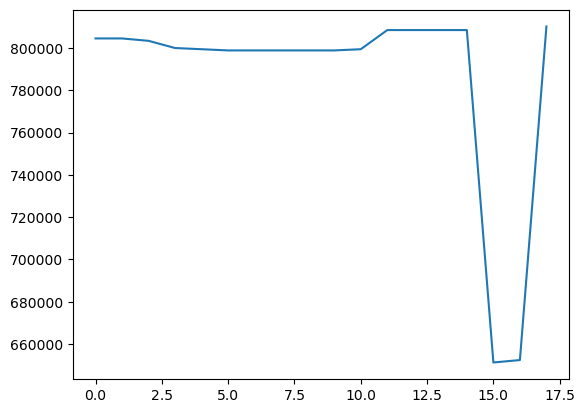

In [28]:
from libtiff import TIFF
import numpy as np
import matplotlib.pyplot as plt

argmax = np.array([])
tif = TIFF.open('21_vbnfa_ai.tif', mode='r')
for image in tif.iter_images(): 
    argmax = np.append(argmax, np.argmax(image))
    #print(np.argmax(image))
print(argmax)
plt.plot(range(0,18), argmax)

In [ ]:
#peak SNR and regularization constant

from libtiff import TIFF
from imutils import contours
from skimage import measure
import imutils
import numpy as np
import cv2
import matplotlib.pyplot as plt


tif = TIFF.open('MAX_30_vbnfa_no.tif', mode='r')


for img in tif.iter_images(): 
	#img = cv2.imread('21_vbnfa_ai.tif', cv2.COLOR_BGR2GRAY)
	#img = cv2.imread('PSF RW.tif','21_vbnfa_ai.tif' cv2.IMREAD_UNCHANGED)
	blurred = cv2.GaussianBlur(img, (3, 3), 0)
	#print(f'dtype: {img.dtype}, shape: {img.shape}, min: {np.min(img)}, max: {np.max(img)}')
	thresh = cv2.threshold(blurred, blurred.max()*0.6, blurred.max(), cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=4)
	thresh = np.where(thresh>0, 1, 0)
	labels = measure.label(thresh, connectivity=2)
	mask = np.zeros(thresh.shape, dtype="uint8")
	for label in np.unique(labels):
		if label == 0:
			continue
		labelMask = np.zeros(thresh.shape, dtype="uint8")
		labelMask[labels == label] = 255
		numPixels = cv2.countNonZero(labelMask)
		if numPixels > 30:
			mask = cv2.add(mask, labelMask)
		
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	if bool(cnts):
		cnts = contours.sort_contours(cnts)[0]
		(x, y, w, h) = cv2.boundingRect(cnts[0])
		SNR = np.array([])
		regular = np.array([])
		for i in range(x+1, x+h-1):
			for j in range(y+1, y+h-1):
				if np.std(img[j:j+2, i:i+2]) !=0:
					SNR = np.append(SNR, np.average(img[j:j+2, i:i+2])/np.std(img[j:j+2, i:i+2]))
					
		regular = np.append(regular, 50/np.max(SNR))
		#plt.imshow(img[y:y+h, x:x+w])
		cv2.drawContours(img, cnts, 0, (250,250,250), 3)
		cv2.imshow('Image', img)
		cv2.waitKey(0)
print(SNR)
print(max(SNR))
print(np.min(regular))
#cv2.imshow('Image', img)
#cv2.drawContours(img, cnts, 0, (25,25,25), 3)
#plt.imshow(img)
#cv2.waitKey(0)

[7.5055535  7.5055535  7.         ... 6.35085296 5.         6.35085296]
166.85422779580185
0.2996627694755843


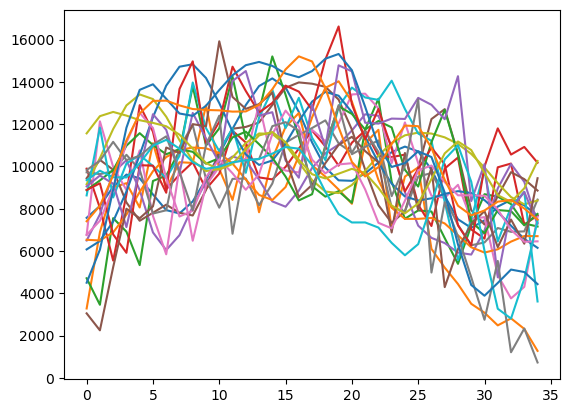

In [10]:
#
import pandas as pd
from libtiff import TIFF
from imutils import contours
from skimage import measure
import imutils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import draw
from scipy import signal

tif = TIFF.open('cluster_try.tif', mode='r')
df1 = pd.DataFrame()

for img in tif.iter_images(): 

	blurred = cv2.GaussianBlur(img, (5, 5), 0)

	thresh = cv2.threshold(blurred, blurred.max()*0.6, blurred.max(), cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=3)
	thresh = np.where(thresh>0, 1, 0)
	labels = measure.label(thresh, connectivity=2)
	mask = np.zeros(thresh.shape, dtype="uint8")
	for label in np.unique(labels):
		if label == 0:
			continue
		labelMask = np.zeros(thresh.shape, dtype="uint8")
		labelMask[labels == label] = 255
		numPixels = cv2.countNonZero(labelMask)
		if numPixels > 30:
			mask = cv2.add(mask, labelMask)
		
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	if bool(cnts):
		cnts = contours.sort_contours(cnts)[0]
		for n, contour in enumerate(cnts):
			
			(x, y, w, h) = cv2.boundingRect(contour)
			
			lineim = cv2.line(img.copy(), (x, y), (x+w, y+h), (51255, 51255, 51255), 2)
			line = np.transpose(np.array(draw.line(x, y, x+w, y+h)))
			
			data = img[line[:, 1], line[:, 0]]
			df1[f'cont{n}'] = pd.Series(signal.resample((data),35))
			plt.figure('Intensity profile')
			plt.plot(signal.resample((data),35))
			

			plt.draw()

			#plt.imshow(img[y:y+h, x:x+w])
		cv2.drawContours(img, cnts, -1, (51155,51155,51155), 3)
		imS = cv2.resize(img, (1920, 1080)) 
		cv2.imshow('Image', imS)
		cv2.waitKey(0)




df1.to_excel('output.xlsx')

14.13
16.38
0.58
14.13
16.38
0.58
14.13
16.38
0.58


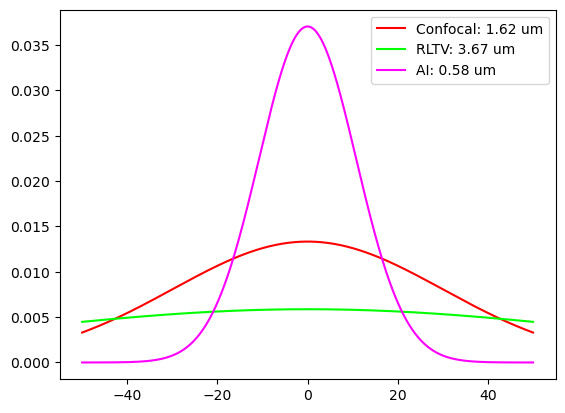

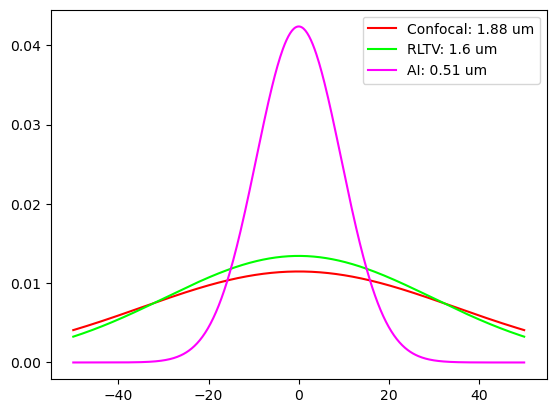

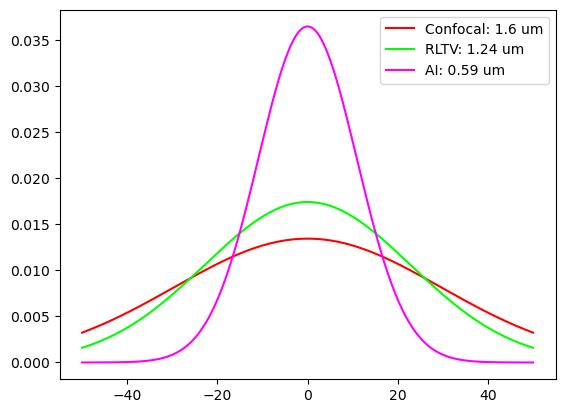

In [20]:
#
import pandas as pd
from libtiff import TIFF
from imutils import contours
from skimage import measure
import imutils
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import draw
from scipy import signal
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy import stats

exc_tiffs = []
#tiffs = ['sted_acut.tif','RLTV_cut.tif','conf_cut.tif','ai_cut.tif','axz.tif', 'ayz.tif', 'rlxz.tif','rlyz.tif','sxz.tif','syz.tif','cxz.tif','cyz.tif']
tiffs = ['C:\\Users\\antim\\Desktop\\ip3rcl\\rawxy.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\rawxz.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\rawyz.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\rltvxy.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\rltvxz.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\rltvyz.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\aixy.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\aixz.tif','C:\\Users\\antim\\Desktop\\ip3rcl\\aiyz.tif']
#tiffs = ['C:\\Users\\antim\\Desktop\\spheres_supplement\\MAX_sted_no_11.tif']
for isobr in tiffs:
    tif = TIFF.open(isobr, mode='r')
    df1 = pd.DataFrame()

    for n, img in enumerate(tif.iter_images()): 

        blurred = cv2.GaussianBlur(img, (5, 5), 0)

        thresh = cv2.threshold(blurred, blurred.max()*0.7, blurred.max(), cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=3)
        thresh = np.where(thresh>0, 1, 0)
        labels = measure.label(thresh, connectivity=2)
        mask = np.zeros(thresh.shape, dtype="uint8")
        for label in np.unique(labels):
            if label == 0:
                continue
            labelMask = np.zeros(thresh.shape, dtype="uint8")
            labelMask[labels == label] = 255
            numPixels = cv2.countNonZero(labelMask)
            if numPixels > 80:
                mask = cv2.add(mask, labelMask)
            
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        if bool(cnts):
            cnts = contours.sort_contours(cnts)[0]
            (x, y, w, h) = cv2.boundingRect(cnts[0])
            lineim = cv2.line(img.copy(), (x, y+h-1), (x+w-1, y), (255, 255, 255), 2)
            #lineim = cv2.line(img, (x, y+h-1), (x+w-1, y), (255, 255, 255), 2)
            line = np.transpose(np.array(draw.line(x, y+h-1, x+w-1, y)))
            data = img[line[:, 1], line[:, 0]]
            df1[f'cont{n}'] = pd.Series(signal.resample((data),35))
            #plt.figure('Intensity profile')
            #plt.plot(signal.resample((data),35))
            #plt.draw()
            #cv2.drawContours(img, cnts, -1, (51155,51155,51155), 3)
            #imS = cv2.resize(img, (1920, 1080)) 
            #cv2.imshow('Image', imS)
            #cv2.imshow('Image', img)
            #cv2.waitKey(0)


    mean,std=norm.fit(df1.mean(axis=1))
    df1['mean'] = df1.mean(axis=1)
    df1['fit'] = pd.Series([mean, std])
    df1.to_excel(f'{isobr}.xlsx')
    


#exc_tiffs = [['C:\\Users\\antim\\Desktop\\spheres_supplement\\xz_sted.tif.xlsx', 'C:\\Users\\antim\\Desktop\\spheres_supplement\\yz_sted.tif.xlsx'],
      #   ['C:\\Users\\antim\\Desktop\\spheres_supplement\\MAX_xz_conf.tif.xlsx', 'C:\\Users\\antim\\Desktop\\spheres_supplement\\MAX_yz_conf.tif.xlsx']]
exc_tiffs = [['C:\\Users\\antim\\Desktop\\ip3rcl\\rawxz.tif.xlsx','C:\\Users\\antim\\Desktop\\ip3rcl\\rawyz.tif.xlsx', 'C:\\Users\\antim\\Desktop\\ip3rcl\\rawxy.tif.xlsx'],['C:\\Users\\antim\\Desktop\\ip3rcl\\rltvxz.tif.xlsx','C:\\Users\\antim\\Desktop\\ip3rcl\\rltvyz.tif.xlsx', 'C:\\Users\\antim\\Desktop\\ip3rcl\\rltvxy.tif.xlsx'],['C:\\Users\\antim\\Desktop\\ip3rcl\\aixz.tif.xlsx','C:\\Users\\antim\\Desktop\\ip3rcl\\aiyz.tif.xlsx','C:\\Users\\antim\\Desktop\\ip3rcl\\aixy.tif.xlsx']]
colours = [(1, 0, 0), (0,1,0), (1,0,1)]

def twodplit(sigma, colour):
    x = np.linspace(-25, 25, 100)
    plt.plot(x, stats.norm.pdf(x, 0, sigma), color=colour, label=f'FWHM: {sigma} um')
std=[]
for n, pair in enumerate(exc_tiffs):
    xz = pd.read_excel(pair[0])
    yz = pd.read_excel(pair[1])
    xy = pd.read_excel(pair[2])
    xz.dropna(subset = ['fit'], inplace=True)
    yz.dropna(subset = ['fit'], inplace=True)
    xy.dropna(subset = ['fit'], inplace=True)
    muxz, stdxz = 0, xz['fit'].tolist()[1]
    muyz, stdyz = 0, yz['fit'].tolist()[1]
    muxy, stdxy = 0, xy['fit'].tolist()[1]
    std.append([stdxy,stdxz,stdyz])
for n, pair in enumerate(exc_tiffs):
    x = np.linspace(-50, 50, 500)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.plot(x, stats.norm.pdf(x, 0, std[0][n]), color=colours[0], label=f'Confocal: {np.round(std[0][n]*0.054, 2)} um')
    ax.plot(x, stats.norm.pdf(x, 0, std[1][n]), color=colours[1], label=f'RLTV: {np.round(std[1][n]*0.054, 2)} um')
    ax.plot(x, stats.norm.pdf(x, 0, std[2][n]), color=colours[2], label=f'AI: {np.round(std[2][n]*0.054, 2)} um')
    ax.legend()
    fig.savefig(f'{pair[0]}.png')
    print(np.round(xz['fit'].tolist()[1]*1.5,2))
    print(np.round(yz['fit'].tolist()[1]*1.5,2))
    print(np.round(xy['fit'].tolist()[1]*0.054,2))

def threedplot(muxz, muyz, stdxz, stdyz):
    x, y = np.mgrid[-150.0:150.0:30j, -150.0:150.0:30j]
    xy = np.column_stack([x.flat, y.flat])
    mu = np.array([muxz,  muyz])
    sigma = np.array([stdxz, stdyz])

    covariance = np.diag(sigma**2)

    z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)*99000

    z = z.reshape(x.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot_surface(x,y,z, shade=False, facecolor=(0,0,0,0.0001), edgecolor=colours[n])
    ax.set_facecolor((0,0,0,0.0001))
    ax.set_xlabel('YZ FWHM')
    ax.set_ylabel('XZ FWHM')

def twodplit(sigma, colour):
    x = np.linspace(-25, 25, 100)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, stats.norm.pdf(x, 0, sigma), color=colour, label=f'FWHM: {sigma} um')
    



In [4]:
import matlab.engine
eng = matlab.engine.start_matlab()
eng.fft2script('sted_acut.tif','RLTV_cut.tif','conf_cut.tif','ai_cut.tif', nargout=0)

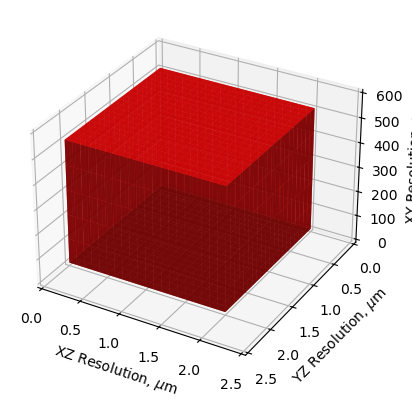

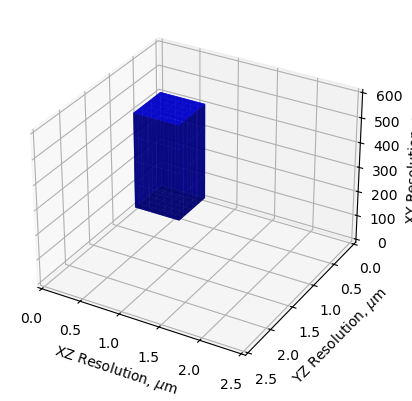

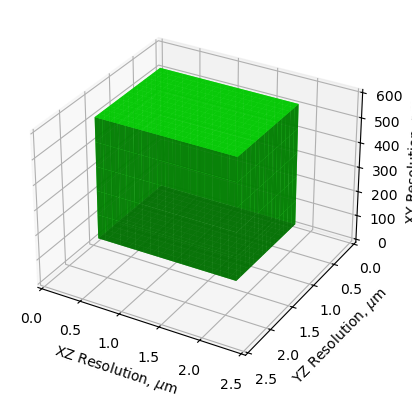

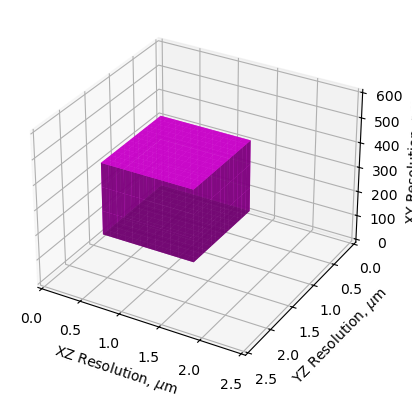

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
alpha = 0.8
colours = [[1,0,0, alpha],[0,0,1, alpha],[0,1,0, alpha], [1, 0, 1, alpha]]
#0.3*10 = 3
#xz, yz, xy
sizes = [[20, 20, 5], [6, 6, 4],[18, 14, 5],[12, 13, 3]]

for n, i in enumerate(sizes):
    data = np.ones(i, dtype=bool)
    colors = np.empty(i + [4], dtype=np.float32)
    colors[:] = colours[n]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(0,25)
    ax.set_ylim(0,25)
    ax.set_zlim(0,2.5)
    ax.invert_yaxis()
    zticks = np.arange(0, 7, 1)
    zlabels = [f'{z*100}' for z in zticks]
    ax.set_zticks(zticks, labels=zlabels)
    yticks = np.arange(0, 30, 5)
    ylabels = [f'{y/10}' for y in yticks]
    ax.set_yticks(yticks, labels=ylabels)
    xticks = np.arange(0, 30, 5)
    xlabels = [f'{x/10}' for x in xticks]
    ax.set_xticks(xticks, labels=xlabels)
    ax.set_xlabel('XZ Resolution, $\mu$m')
    ax.set_ylabel('YZ Resolution, $\mu$m')
    ax.set_zlabel('XY Resolution, nm')
    ax.voxels(data, facecolors=colors)
    fig.savefig(f'{i}.png')
    #plt.tight_layout(pad=0.4, w_pad=1.5, h_pad=1.0)


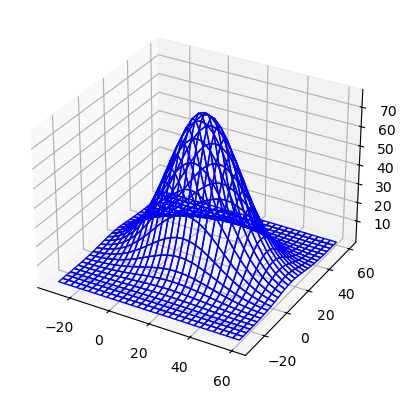

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-30.0:60.0:30j, -30.0:60.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
#sted
#mu = np.array([15.88, 17.52])
#sigma = np.array([14.68, 12.36])
#confocal
#mu = np.array([16, 17.21])
#sigma = np.array([11, 11.3])
#rl
#mu = np.array([16.25, 15.3])
#sigma = np.array([10.52, 10.17])
#ai
#mu = np.array([16.8, 15.67])
#sigma = np.array([6, 9])


#sted
#yz xz
#mu = np.array([15.89, 17.52])
#sigma = np.array([16.65, 12.36])
#confocal
#mu = np.array([15.69, 17.21])
#sigma = np.array([12.09, 11.34])
#rl
#mu = np.array([16.68, 15.3])
#sigma = np.array([14.47, 10.17])
#ai
#mu = np.array([12.98, 15.67])
#sigma = np.array([17.04, 9.185])
#sted 2 attempt
#mu = np.array([16.50, 14.86])
#sigma = np.array([12.69, 14.51])
#confocal 2 attempt
mu = np.array([15.40, 16.62])
sigma = np.array([14.40, 11.84])


covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)*99000

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, shade=False, facecolor=(0,0,0,0.0001), edgecolor=(0,0,1))
ax.set_facecolor((0,0,0,0.0001))
#ax.plot_wireframe(x,y,z)
#ax.set_xlabel('YZ FWHM')
#ax.set_ylabel('XZ FWHM')
plt.show()

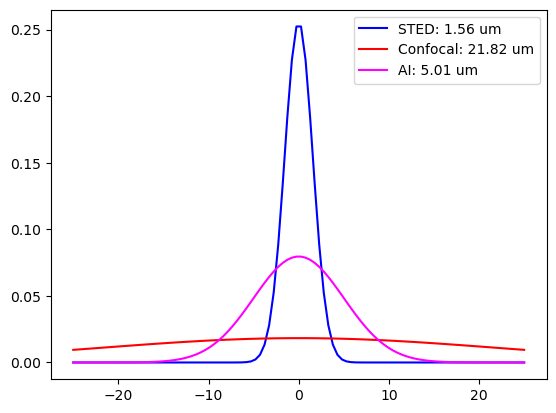

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


mu = 0
# xy sigmaconf, sigmasted, sigmaai  = 2.14, 3.71, 2.62
# xz sigmaconf, sigmasted, sigmaai  = 18.77, 1.41, 4.28
sigmaconf, sigmasted, sigmaai  = 21.82, 1.56, 5.01
x = np.linspace(mu - 25, mu + 25, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigmasted), color='blue', label=f'STED: {sigmasted} um')
plt.plot(x, stats.norm.pdf(x, mu, sigmaconf), color='red', label=f'Confocal: {sigmaconf} um')
plt.plot(x, stats.norm.pdf(x, mu, sigmaai), color='#ff00ff', label=f'AI: {sigmaai} um')
plt.legend()
plt.show()


In [ ]:
pip install pylibtiff
pip install --upgrade imutils
conda install scikit-image
SNR = np.append(SNR, np.average(img[j:j+2, i:i+2])/np.sqrt(np.std(img[j:j+2, i:i+2])**2+np.average(img[j:j+2, i:i+2])**2))
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(img, (int(cX), int(cY)), int(radius),
		(0, 0, 100), 3)
	cv2.putText(img, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 100), 2)
# show the output image


 image = cv2.line(image_copy.copy(), (r_start, c_start), (r_end, c_end), (255, 255, 255), 2)
        line = np.transpose(np.array(draw.line(r_start, c_start, r_end, c_end)))
        data = image_copy.copy()[line[:, 1], line[:, 0], :]
        plt.close()
        plt.figure('Intensity profile')
        plt.plot(data[:, 0], 'b', data[:, 1], 'g', data[:, 2], 'r')
        plt.draw()


(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(0,255,0),2)

In [ ]:
from scipy.ndimage import gaussian_filter
img = gaussian_filter(img, sigma=(5,5,0))

brightest = img.max()
threshold = brightest // 2
np.where(img > threshold, 255, 0)

In [ ]:
def erode_this(image_file, erosion_level=3, with_plot=False):
    erosion_level = 3 if erosion_level < 3 else erosion_level

    structuring_kernel = np.full(shape=(erosion_level, erosion_level), fill_value=255)
    image_src = binarize_this(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = erosion_level - 2

    # pad the matrix with `pad_width`
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # sub matrices of kernel size
    flat_submatrices = np.array([
        image_pad[i:(i + erosion_level), j:(j + erosion_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == structuring_kernel).all() else 0 for i in flat_submatrices])
    image_erode = image_erode.reshape(orig_shape)

    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Eroded - {}".format(erosion_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_erode, cmap=cmap_val)
        plt.show()
        return True
    return image_erode

In [29]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to the image file")
args = vars(ap.parse_args())

# load the image, convert it to grayscale, and blur it
#image = cv2.imread(args["image"])
image = cv2.imread('PSF RW.tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)
		# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(cX), int(cY)), int(radius),
		(0, 0, 255), 3)
	cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

SyntaxError: invalid syntax (1644434926.py, line 13)

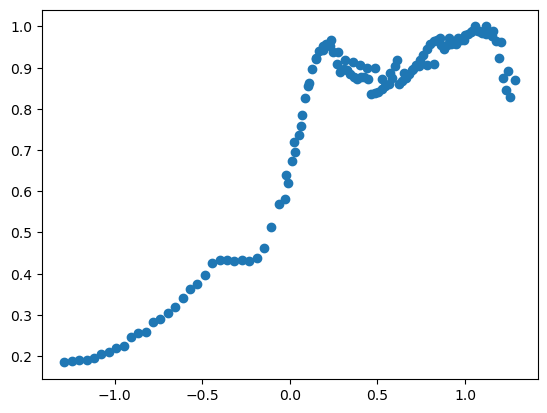

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

df = pd.read_excel('C:\\Users\\antim\\Documents\\MATLAB\\processed data\\results\\MAX_no_preproc-results.xlsx', sheet_name='Cisternal profile')
y = signal.resample(df['mean'].tolist(), 50)
plt.scatter(df['x'].tolist(), df['mean'].tolist())



In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
group = 'ai00'

pathlist = Path('C:\\Users\\antim\\newSpineTool\\SpineTool\\output\\').glob(f'{group}*/metrics.csv')


list_of_numbers = []
volumes = []
df1 = pd.DataFrame()

for path in pathlist:
    path_in_str = str(path)   
    df=pd.read_csv(path_in_str)
    df.dropna(subset = ['Volume'], inplace = True)
    list_of_numbers.append(df.shape[0])
    volumes.append(np.mean(df['Volume'].tolist()))

df1['number_of_spines'] = pd.Series(list_of_numbers)
df1['Volume'] = pd.Series(volumes)

df1

,number_of_spines,Volume
0,14,53.403831
1,15,6.973773
2,28,7.055390
3,18,7.663974
4,33,9.154748
